In [1]:
import pandas as pd
import numpy as np

EEG_data = []
Labels = []

for i in range(22):
    try:
        file_path = f"_DATA/eeg_data/{i+1:02}_thinking.csv"
        data = pd.read_csv(file_path)
        
        grouped = data.groupby('Epoch')
        
        subject_EEG = []
        subject_Labels = []
        for name, group in grouped:
            EEG_signals = group.iloc[:, 2:16].values
            label = group.iloc[0, 16]
            subject_EEG.append(EEG_signals)
            subject_Labels.append(label)
        
        EEG_data.append(np.array(subject_EEG))
        Labels.append(np.array(subject_Labels))

    except FileNotFoundError:
        print(f"{i+1:02} 번 파일이 존재하지 않습니다.")
        continue

all_EEG_data = np.vstack(EEG_data)
all_Labels = np.hstack(Labels)


unique_labels = np.unique(all_Labels)
label_to_int = {label: i for i, label in enumerate(unique_labels)}


05 번 파일이 존재하지 않습니다.
12 번 파일이 존재하지 않습니다.
22 번 파일이 존재하지 않습니다.


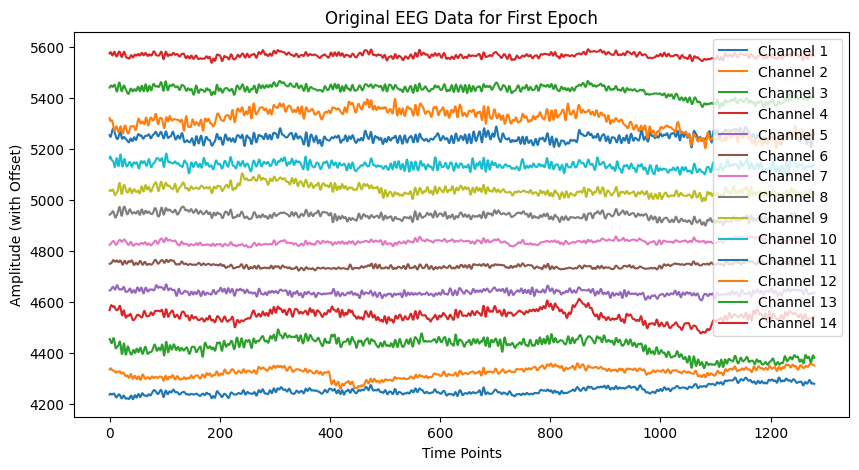

In [4]:
import matplotlib.pyplot as plt

def plot_original_eeg(data, epoch_idx=0):
    fig, ax = plt.subplots(figsize=(10, 5))
    offset = 100
    for channel in range(data.shape[2]):
        ax.plot(data[epoch_idx, :, channel] + offset * channel, label=f"Channel {channel+1}")
    ax.set_title("Original EEG Data for First Epoch")
    ax.set_xlabel("Time Points")
    ax.set_ylabel("Amplitude (with Offset)")
    ax.legend(loc="upper right")
    plt.show()

plot_original_eeg(all_EEG_data)


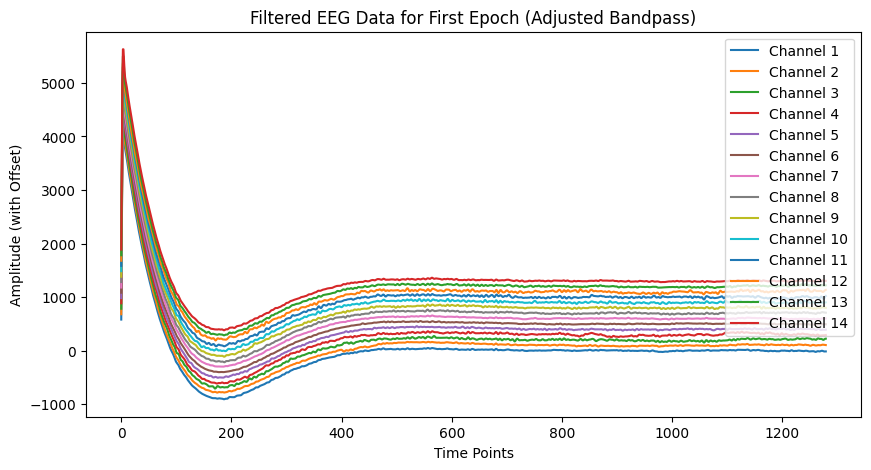

In [9]:
from scipy.signal import butter, lfilter

# Bandpass 필터 함수 수정
def butter_bandpass(lowcut, highcut, fs, order=2):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut=4, highcut=30, fs=256, order=2):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=0)
    return y

# 필터링 후 데이터 시각화 함수
def plot_filtered_eeg(data, epoch_idx=0, fs=256):
    filtered_data = bandpass_filter(data[epoch_idx], lowcut=0.5, highcut=40, fs=fs, order=2)
    fig, ax = plt.subplots(figsize=(10, 5))
    offset = 100  # 오프셋을 낮춰서 보기 쉽게 변경
    for channel in range(filtered_data.shape[1]):
        ax.plot(filtered_data[:, channel] + offset * channel, label=f"Channel {channel+1}")
    ax.set_title("Filtered EEG Data for First Epoch (Adjusted Bandpass)")
    ax.set_xlabel("Time Points")
    ax.set_ylabel("Amplitude (with Offset)")
    ax.legend(loc="upper right")
    plt.show()

# 호출
plot_filtered_eeg(all_EEG_data)


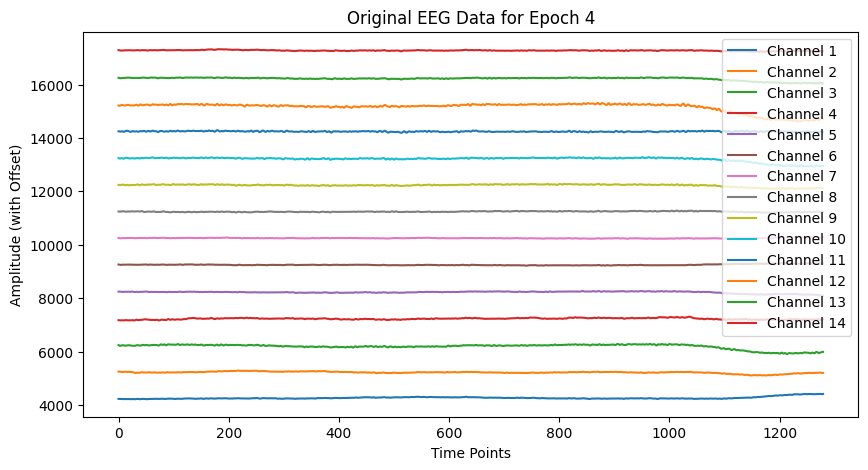

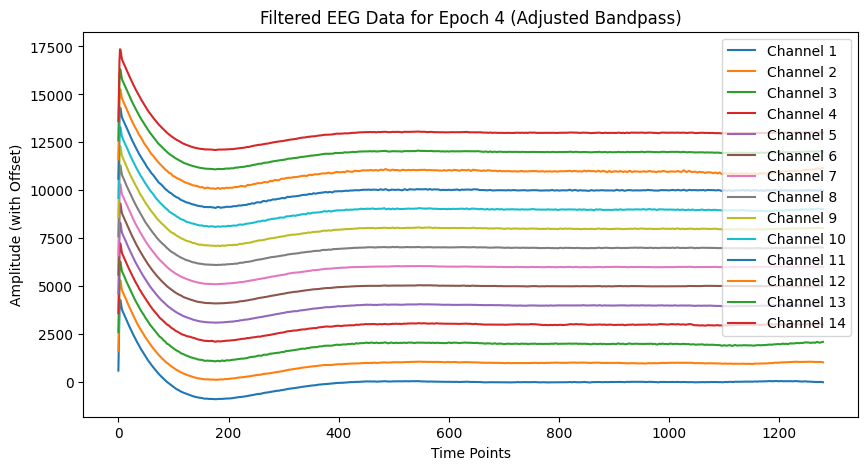

In [11]:
# 특정 epoch의 원본 EEG 데이터 시각화
def plot_original_eeg(data, epoch_idx=0):
    fig, ax = plt.subplots(figsize=(10, 5))
    offset = 1000  # 각 채널 간격을 두기 위한 오프셋
    for channel in range(data.shape[2]):
        ax.plot(data[epoch_idx, :, channel] + offset * channel, label=f"Channel {channel+1}")
    ax.set_title(f"Original EEG Data for Epoch {epoch_idx + 1}")
    ax.set_xlabel("Time Points")
    ax.set_ylabel("Amplitude (with Offset)")
    ax.legend(loc="upper right")
    plt.show()

# 특정 epoch의 필터링된 EEG 데이터 시각화
def plot_filtered_eeg(data, epoch_idx=0, fs=250):
    filtered_data = bandpass_filter(data[epoch_idx], lowcut=0.5, highcut=40, fs=fs, order=2)
    fig, ax = plt.subplots(figsize=(10, 5))
    offset = 1000  # 오프셋을 낮춰서 보기 쉽게 설정
    for channel in range(filtered_data.shape[1]):
        ax.plot(filtered_data[:, channel] + offset * channel, label=f"Channel {channel+1}")
    ax.set_title(f"Filtered EEG Data for Epoch {epoch_idx + 1} (Adjusted Bandpass)")
    ax.set_xlabel("Time Points")
    ax.set_ylabel("Amplitude (with Offset)")
    ax.legend(loc="upper right")
    plt.show()

# 원하는 epoch 번호 입력
epoch_to_plot = 4  # 예: 5번째 epoch

# 원본 신호 시각화
plot_original_eeg(all_EEG_data, epoch_idx=epoch_to_plot - 1)

# 필터링 후 신호 시각화
plot_filtered_eeg(all_EEG_data, epoch_idx=epoch_to_plot - 1)
